In [1]:
#Task 1: Data Preparation


# import all required libraries 
import numpy as np
import pandas as pd
from pandas import Series, DataFrame
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from pandas.plotting import scatter_matrix


#load the data from automobile.csv file to pandas
automobile_p = 'Automobile.csv'
automobile = pd.read_csv(automobile_p, sep='#', decimal='.', header=None,names=['symboling','normalized-losses','make','fuel-type','aspiration','num-of-doors','body-style','drive-wheels','engine-location','wheel-base','length','width','height','curb-weight','engine-type','num-of-cylinders','engine-size','fuel-system','bore','stroke','compression-ratio','horsepower','peak-rpm','city-mpg','highway-mpg','price'],error_bad_lines=False)


#Remove extra whitespaces 
def trim_all_columns(df):
    trim_strings = lambda x: x.strip() if type(x) is str else x
    return df.applymap(trim_strings)
automobile = trim_all_columns(automobile)


#Convert all nominal values to lowercase
automobile = automobile.applymap(lambda s:s.lower() if type(s) == str else s)


#Checking spelling mistakes for all nominal values
print automobile.make.unique()
print automobile['fuel-type'].unique()
print automobile.aspiration.unique()
print automobile['num-of-doors'].unique()
print automobile['body-style'].unique()
print automobile['drive-wheels'].unique()
print automobile['engine-location'].unique()
print automobile['engine-type'].unique() 
print automobile['num-of-cylinders'].unique()
print automobile['fuel-system'].unique()


#Correcting all typos from the observied typos
automobile['make'].replace('vol00112ov','volvo',inplace = True)
automobile['aspiration'].replace('turrrrbo','turbo',inplace = True)
automobile['num-of-doors'].replace('fourr','four',inplace = True)


#Sanity check, Check for impossible values
print automobile['symboling'][(-3> automobile['symboling']) | (automobile['symboling'] > 3)]
print automobile['normalized-losses'][(65> automobile['normalized-losses']) | (automobile['normalized-losses'] > 256)]
print automobile['wheel-base'][(86.6> automobile['wheel-base']) | (automobile['wheel-base'] > 120.9)]
print automobile['length'][(141.1> automobile['length'])| (automobile['length'] > 208.1)]
print automobile['width'][(60.3> automobile['width']) | (automobile['width'] > 72.3)]
print automobile['height'][(47.8> automobile['height']) | (automobile['height'] > 59.8)]
print automobile['curb-weight'][(1488> automobile['curb-weight']) | (automobile['curb-weight']  > 4066)]
print automobile['engine-size'][(61> automobile['engine-size']) | (automobile['engine-size'] > 326)]
print automobile['bore'][(2.54> automobile['bore']) | (automobile['bore']  > 3.94)]
print automobile['stroke'][(2.07> automobile['stroke']) | (automobile['stroke'] > 4.17)]
print automobile['compression-ratio'][(7> automobile['compression-ratio']) | (automobile['compression-ratio'] > 23)]
print automobile['horsepower'][(48> automobile['horsepower']) | (automobile['horsepower']  > 288)]
print automobile['peak-rpm'][(4150> automobile['peak-rpm']) | (automobile['peak-rpm']  > 6600)]
print automobile['city-mpg'][(13> automobile['city-mpg']) | (automobile['city-mpg']  > 49)]
print automobile['highway-mpg'][(16> automobile['highway-mpg']) | (automobile['highway-mpg'] > 54)]
print automobile['price'][(5118> automobile['price'])  | (automobile['price']  > 45400)]


#solving all impossible values
print automobile[automobile['normalized-losses'] == 25]
print automobile[automobile['price'] == 16845.0]
automobile['symboling'].replace(4,-1,inplace=True)
automobile['normalized-losses'].replace(25,95,inplace=True)
automobile['price'].replace(0.0,np.nan,inplace = True)


#removing all duplicate entries from  dataframe.
automobile.drop_duplicates(inplace = True)


#Filling all missing values
print automobile.isnull().sum()
automobile['num-of-doors'].replace(np.nan,'four',inplace = True)
automobile['normalized-losses'] = automobile['normalized-losses'].fillna(automobile.groupby('make')['normalized-losses'].transform('median'))
automobile['price'] = automobile.groupby("make").price.transform(lambda x: x.fillna(x.median()))
automobile['normalized-losses'].fillna(automobile['normalized-losses'].median(axis = 0),inplace=True)
automobile['bore'].fillna(automobile['bore'].median(axis = 0),inplace=True)
automobile['stroke'].fillna(automobile['stroke'].median(axis = 0),inplace=True)
automobile['horsepower'].fillna(automobile['horsepower'].median(axis = 0),inplace=True)
automobile['peak-rpm'].fillna(automobile['peak-rpm'].median(axis = 0),inplace=True)


#Finalcheck of data cleaning 
print("\n\nFinal check of data cleaning \n\n")
print("\n\nBelow are the unique values for ordinal couumns\n")
print automobile.make.unique()
print automobile['fuel-type'].unique()
print automobile.aspiration.unique()
print automobile['num-of-doors'].unique()
print automobile['body-style'].unique()
print automobile['drive-wheels'].unique()
print automobile['engine-location'].unique()
print automobile['engine-type'].unique() 
print automobile['num-of-cylinders'].unique()
print automobile['fuel-system'].unique()
print("\n\ncheck for impossible values\n");
print automobile['symboling'][(-3> automobile['symboling']) | (automobile['symboling'] > 3)]
print automobile['normalized-losses'][(65> automobile['normalized-losses']) | (automobile['normalized-losses'] > 256)]
print automobile['wheel-base'][(86.6> automobile['wheel-base']) | (automobile['wheel-base'] > 120.9)]
print automobile['length'][(141.1> automobile['length'])| (automobile['length'] > 208.1)]
print automobile['width'][(60.3> automobile['width']) | (automobile['width'] > 72.3)]
print automobile['height'][(47.8> automobile['height']) | (automobile['height'] > 59.8)]
print automobile['curb-weight'][(1488> automobile['curb-weight']) | (automobile['curb-weight']  > 4066)]
print automobile['engine-size'][(61> automobile['engine-size']) | (automobile['engine-size'] > 326)]
print automobile['bore'][(2.54> automobile['bore']) | (automobile['bore']  > 3.94)]
print automobile['stroke'][(2.07> automobile['stroke']) | (automobile['stroke'] > 4.17)]
print automobile['compression-ratio'][(7> automobile['compression-ratio']) | (automobile['compression-ratio'] > 23)]
print automobile['horsepower'][(48> automobile['horsepower']) | (automobile['horsepower']  > 288)]
print automobile['peak-rpm'][(4150> automobile['peak-rpm']) | (automobile['peak-rpm']  > 6600)]
print automobile['city-mpg'][(13> automobile['city-mpg']) | (automobile['city-mpg']  > 49)]
print automobile['highway-mpg'][(16> automobile['highway-mpg']) | (automobile['highway-mpg'] > 54)]
print automobile['price'][(5118> automobile['price'])  | (automobile['price']  > 45400)]
print("\n\nNumber of missing values in each column\n")
print automobile.isnull().sum()
print("\n\nBelow are the number of observations after Data Preparation step\n")
print automobile.shape


['alfa-romero' 'audi' 'bmw' 'chevrolet' 'dodge' 'honda' 'isuzu' 'jaguar'
 'mazda' 'mercedes-benz' 'mercury' 'mitsubishi' 'nissan' 'peugot'
 'plymouth' 'porsche' 'renault' 'saab' 'subaru' 'toyota' 'volkswagen'
 'volvo' 'vol00112ov']
['gas' 'diesel']
['std' 'turbo' 'turrrrbo']
['two' 'four' nan 'fourr']
['convertible' 'hatchback' 'sedan' 'wagon' 'hardtop']
['rwd' 'fwd' '4wd']
['front' 'rear']
['dohc' 'ohcv' 'ohc' 'l' 'rotor' 'ohcf' 'dohcv']
['four' 'six' 'five' 'three' 'twelve' 'two' 'eight']
['mpfi' '2bbl' 'mfi' '1bbl' 'spfi' '4bbl' 'idi' 'spdi']
205    4
218    4
231    4
Name: symboling, dtype: int64
205    25.0
218    25.0
231    25.0
Name: normalized-losses, dtype: float64
Series([], Name: wheel-base, dtype: float64)
Series([], Name: length, dtype: float64)
Series([], Name: width, dtype: float64)
Series([], Name: height, dtype: float64)
Series([], Name: curb-weight, dtype: int64)
Series([], Name: engine-size, dtype: int64)
Series([], Name: bore, dtype: float64)
Series([], Name: stro

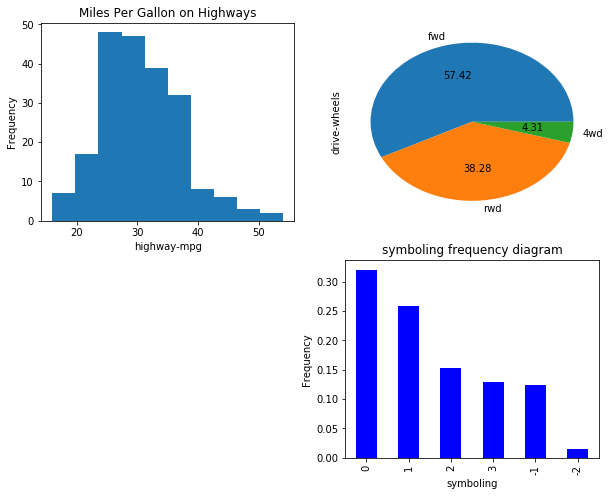

In [2]:
plt.figure(1)
plt.subplot(221)
automobile['highway-mpg'].plot(kind='hist',figsize=(10,8),bins=10)
plt.title('Miles Per Gallon on Highways')
plt.xlabel('highway-mpg')
plt.subplot(222)
automobile['drive-wheels'].value_counts().plot(kind = 'pie',figsize=(10,8), autopct = '%.2f')
plt.subplot(224)
automobile['symboling'].value_counts(normalize=True).plot(figsize=(10,8),kind='bar',color='blue')
plt.title("symboling frequency diagram")
plt.ylabel('Frequency')
plt.xlabel('symboling');

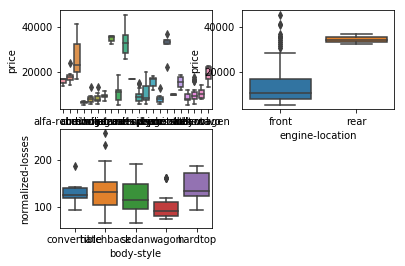

In [3]:
plt.subplot(221)
plt.rcParams['figure.figsize']=(23,10)
ax = sns.boxplot(x="make", y="price", data=automobile)
plt.subplot(222)
plt.rcParams['figure.figsize']=(23,10)
ax = sns.boxplot(x="engine-location", y="price", data=automobile)
plt.subplot(223)
plt.rcParams['figure.figsize']=(23,10)
ax = sns.boxplot(x="body-style", y="normalized-losses", data=automobile)

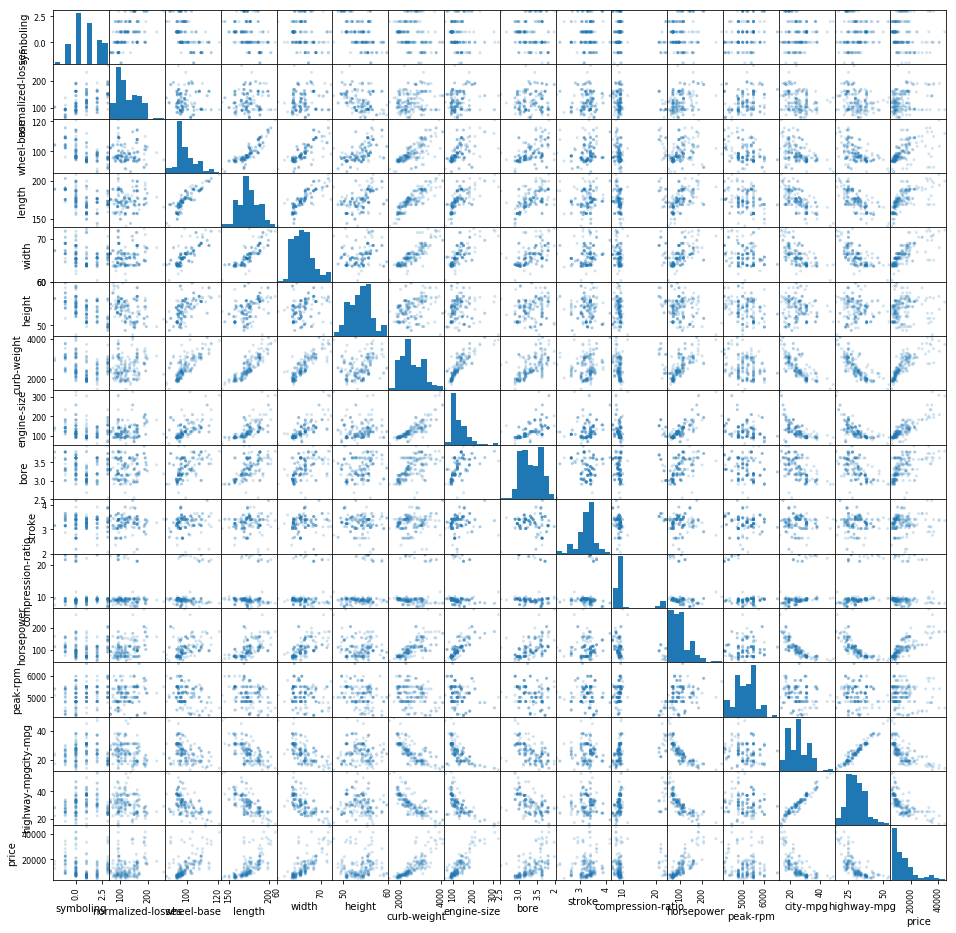

In [4]:
scatter_matrix(automobile,alpha=0.2,figsize=(16,16),diagonal='hist')
plt.show()